In [17]:
from model.cnn import ConvNet
from model.train import train

import torch.optim as optim

from PIL import Image
from model.cnn import ConvNet

from model.dataloader import load_data
from model.train import train
import torch

### Load GTZAN data

The "Data" folder should be placed at "dataset" directory

In [18]:

dataloader=load_data()


999
Train shape:
torch.Size([799, 3, 128, 128])
Val shape:
torch.Size([50, 3, 128, 128])
Test shape:
torch.Size([150, 3, 128, 128])


In [3]:
import os
def save_checkpoint(model):
    """save model checkpoint"""
    model_out_path = "trained/model.pth"
    state = {"epoch": 0 ,"model": model}
    if not os.path.exists("trained/"):
        os.makedirs("trained/")

    torch.save(state, model_out_path)
        
    print("Checkpoint saved to {}".format(model_out_path))
    return model_out_path



In [14]:
model=ConvNet()
optimizer  = optim.Adam(model.parameters(), lr=1e-3,weight_decay=1e-3)
losses,acc=train(model,optimizer,dataloader,epochs=20)

epoch0
Iteration 0, loss = 2.2971
Got 7 / 50 correct (14.00)

Iteration 10, loss = 1.9001
Got 8 / 50 correct (16.00)

epoch1
Iteration 0, loss = 1.6077
Got 4 / 50 correct (8.00)

Iteration 10, loss = 1.3272
Got 17 / 50 correct (34.00)

epoch2
Iteration 0, loss = 1.2194
Got 15 / 50 correct (30.00)

Iteration 10, loss = 1.1714
Got 20 / 50 correct (40.00)

epoch3
Iteration 0, loss = 1.0610
Got 21 / 50 correct (42.00)

Iteration 10, loss = 1.4605
Got 20 / 50 correct (40.00)

epoch4
Iteration 0, loss = 1.1057
Got 11 / 50 correct (22.00)

Iteration 10, loss = 0.8411
Got 26 / 50 correct (52.00)

epoch5
Iteration 0, loss = 0.9727
Got 27 / 50 correct (54.00)

Iteration 10, loss = 0.9076
Got 12 / 50 correct (24.00)

epoch6
Iteration 0, loss = 0.6943
Got 17 / 50 correct (34.00)

Iteration 10, loss = 0.9155
Got 11 / 50 correct (22.00)

epoch7
Iteration 0, loss = 0.5614
Got 22 / 50 correct (44.00)

Iteration 10, loss = 0.6327
Got 24 / 50 correct (48.00)

epoch8
Iteration 0, loss = 0.3690
Got 22 / 5

In [15]:
from model.train import check_accuracy
check_accuracy(dataloader["test"],model)

Got 88 / 150 correct (58.67)


0.5866666666666667

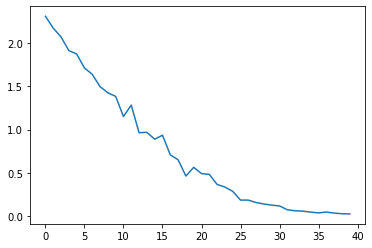

In [12]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.show()

### Save model to file

In [19]:
save_checkpoint(model)

Checkpoint saved to trained/model.pth


'trained/model.pth'

### Load model and test

In [20]:
from model.train import check_accuracy
model = torch.load("trained/model.pth", map_location=lambda storage, location: storage)["model"]
check_accuracy(dataloader["test"],model)


Got 88 / 150 correct (58.67)


0.5866666666666667